### Decision Tree ###

In [47]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [48]:
# ler os dados
df_carros = pd.read_csv('carOriginal.csv')
display(df_carros)

,compra,manutencao,portas,pessoas,porta-malas,seguranca,avaliacao
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [59]:
# Separar atributo e respostas
x = df_carros.drop(labels="avaliacao", axis=1)
y = df_carros[["avaliacao"]]
display(x)
display(y)

,compra,manutencao,portas,pessoas,porta-malas,seguranca
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


,avaliacao
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


### Transformação de variáveis: categorias numéricas ###

In [50]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

transformar = ColumnTransformer(transformers=[('categoricas', OrdinalEncoder(),make_column_selector(dtype_include=object))])

X_transforme = transformar.fit_transform(x)
display(pd.DataFrame(X_transforme, columns=x.columns))

,compra,manutencao,portas,pessoas,porta-malas,seguranca
0,3.0,3.0,0.0,0.0,2.0,1.0
1,3.0,3.0,0.0,0.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,1.0
4,3.0,3.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...
1723,1.0,1.0,3.0,2.0,1.0,2.0
1724,1.0,1.0,3.0,2.0,1.0,0.0
1725,1.0,1.0,3.0,2.0,0.0,1.0
1726,1.0,1.0,3.0,2.0,0.0,2.0


In [51]:
# Separar o treino e o teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transforme, y, test_size=0.25)


### Algoritmo Decision Tree ###

In [52]:
from sklearn import tree

# criando os classificadores
classificador_gini = tree.DecisionTreeClassifier(criterion='gini')
classificador_entropy = tree.DecisionTreeClassifier(criterion='entropy')

# treinando o algoritmo

classificador_gini.fit(X_train, y_train)
classificador_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

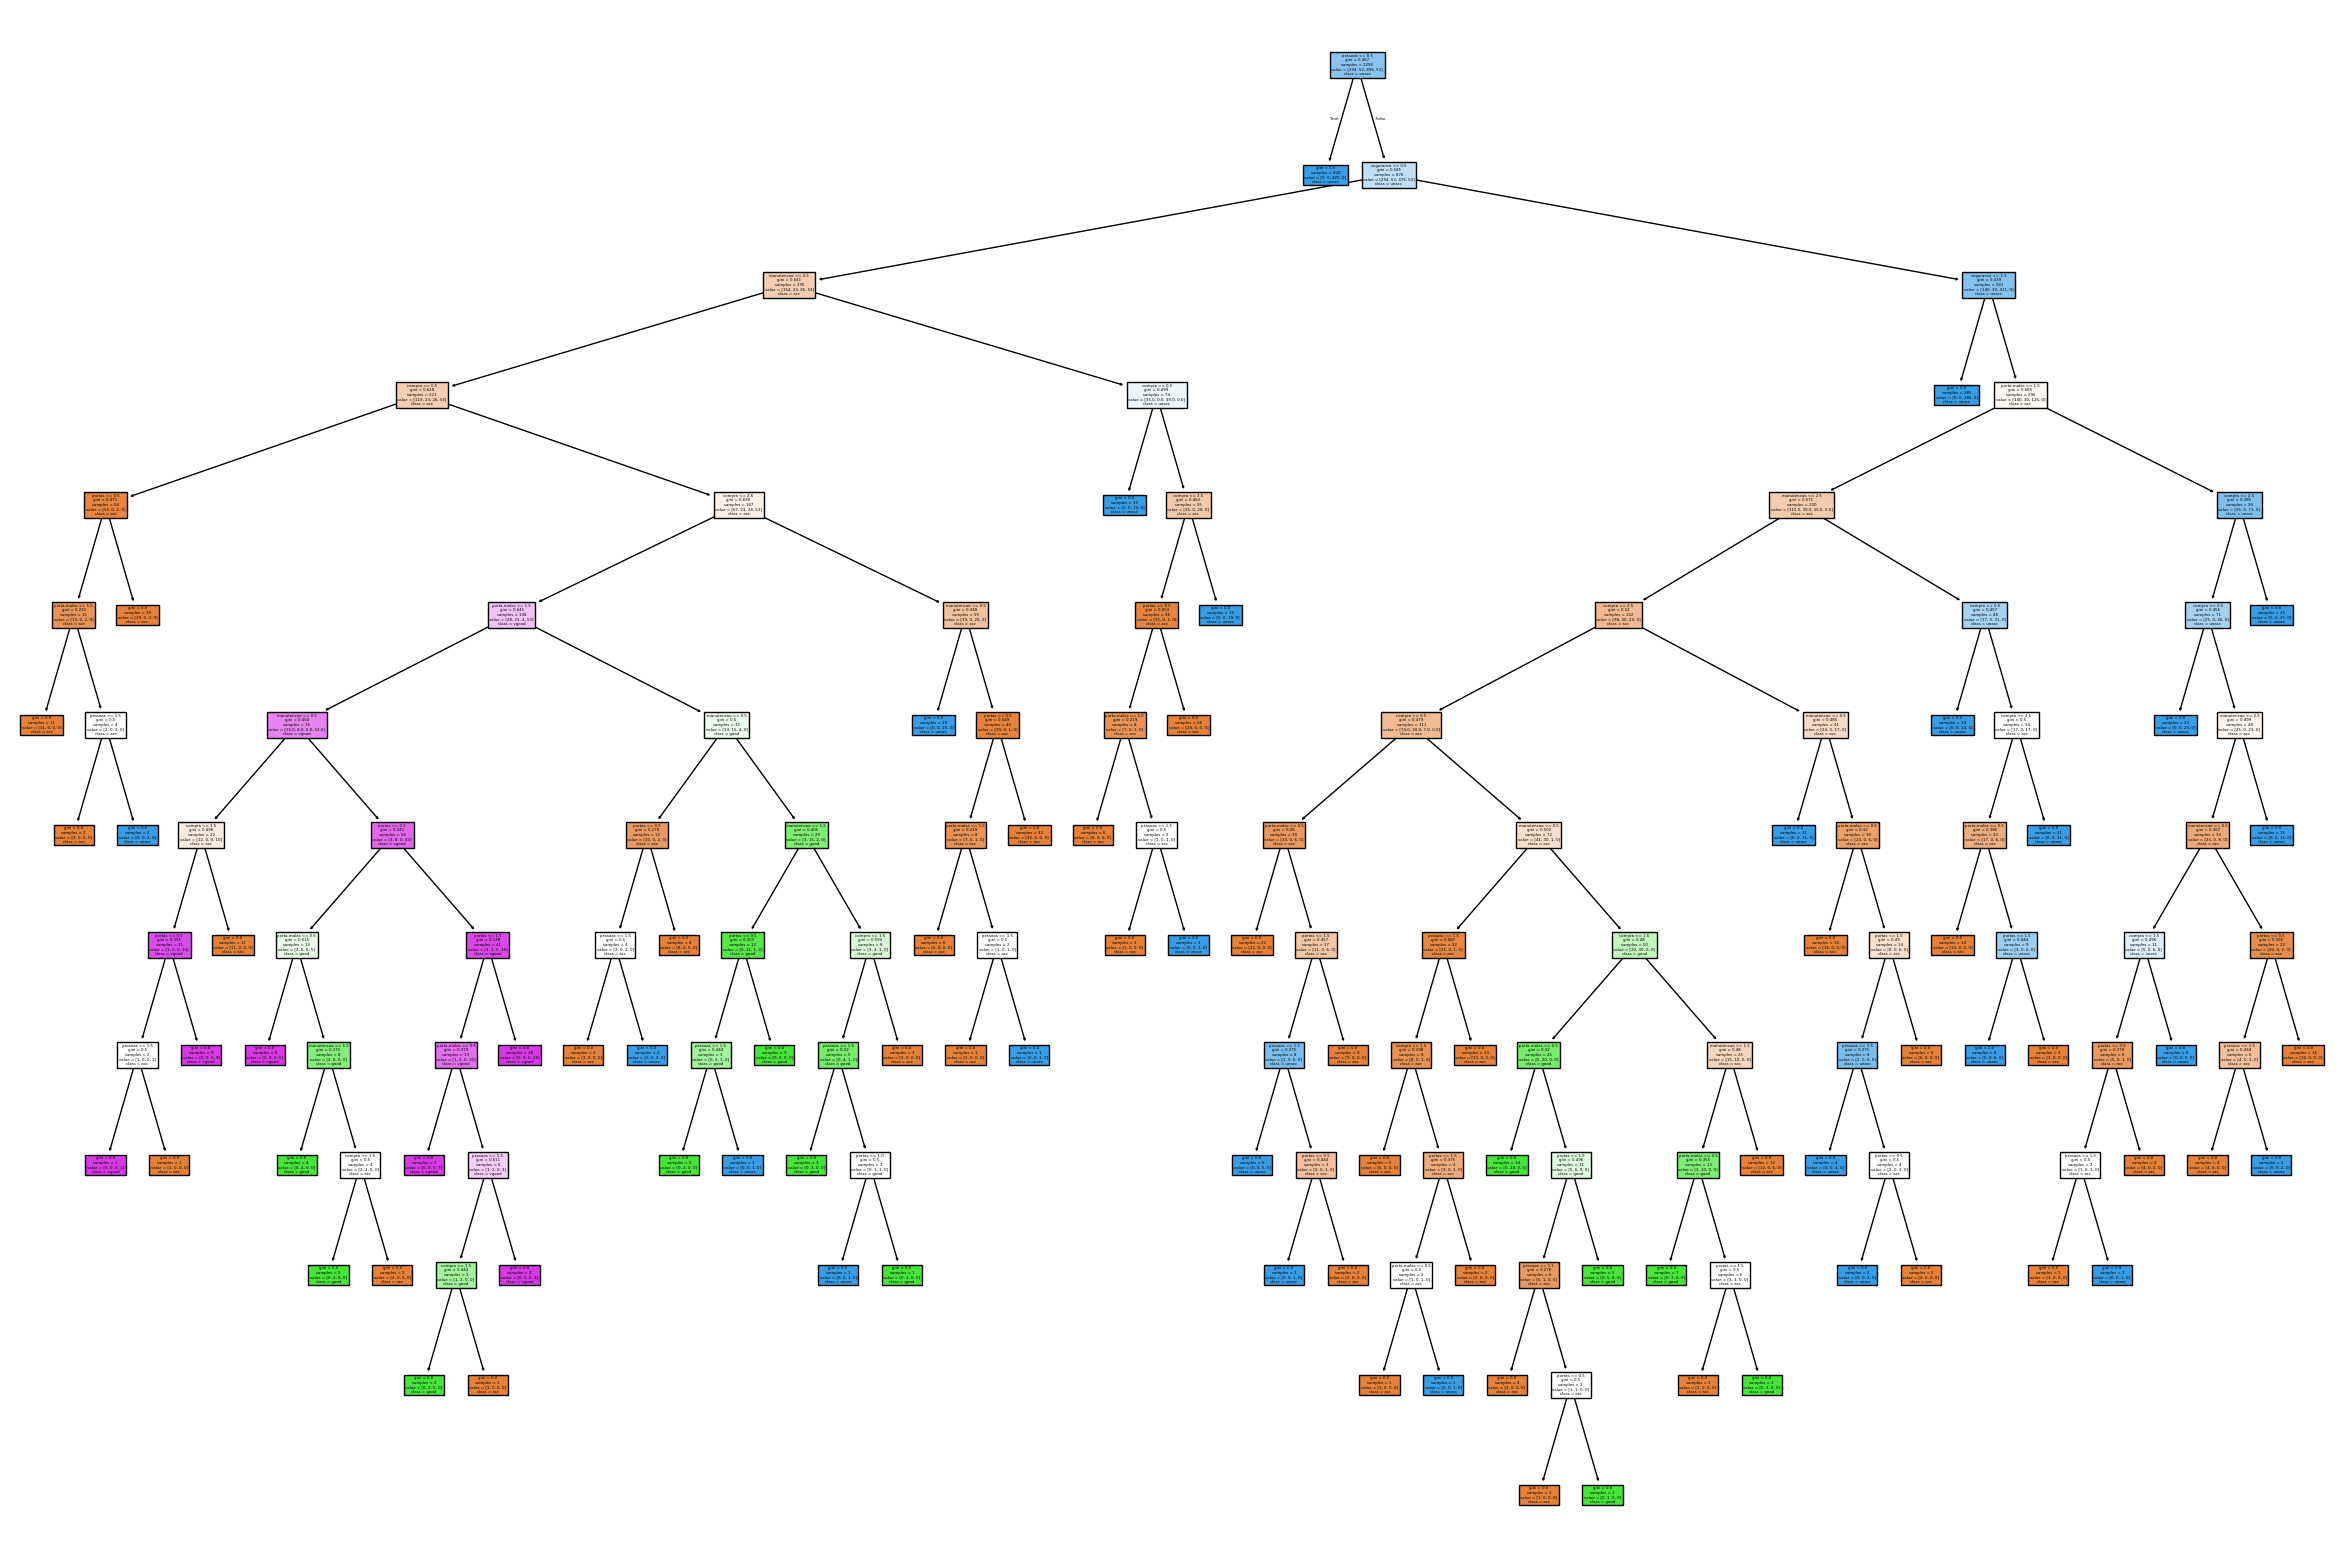

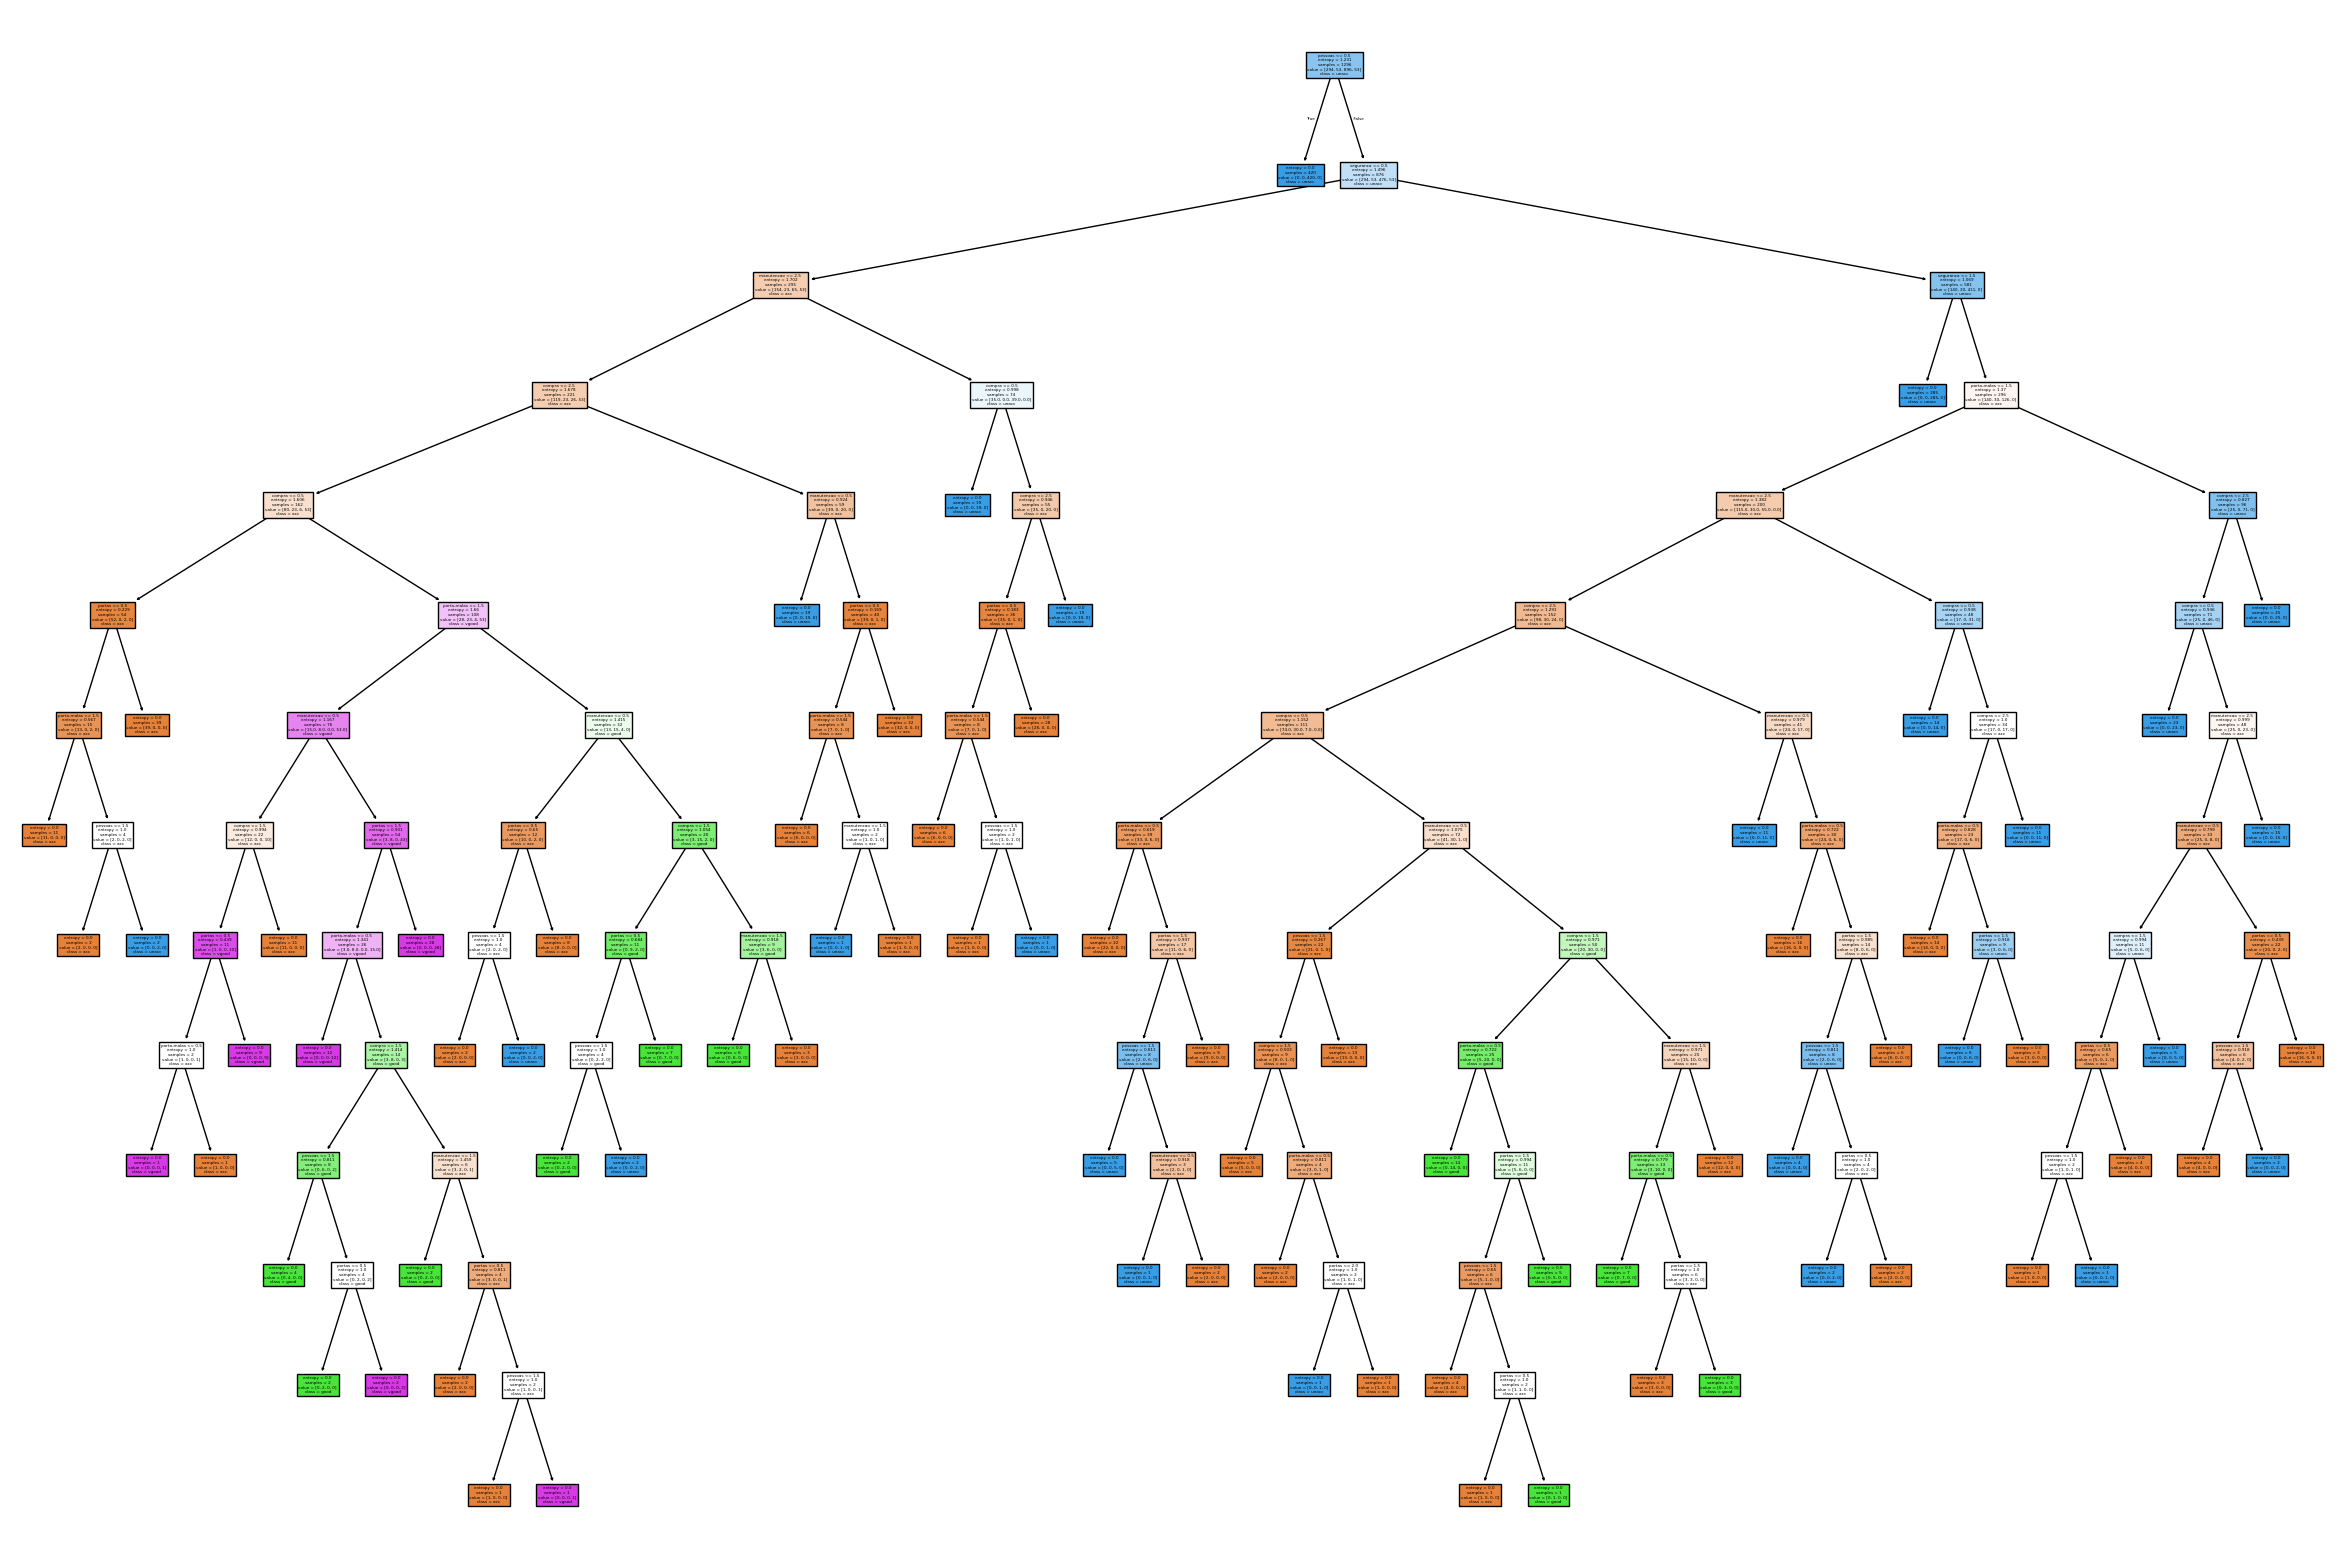

In [53]:
# plotar a Arvore

plt.figure(figsize=(30,20))
tree.plot_tree(classificador_gini, feature_names=x.columns, class_names=classificador_entropy.classes_, filled=True)
plt.show()

plt.figure(figsize=(30,20))
tree.plot_tree(classificador_entropy, feature_names=x.columns, class_names=classificador_entropy.classes_, filled=True)
plt.show()

## Predição

In [54]:
res_gini = classificador_gini.predict(X_test)
res_entropy = classificador_gini.predict(X_test)

## Validar a performance/acurácia

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_gini = accuracy_score(y_test, res_gini)
accuracy_entropy = accuracy_score(y_test, res_entropy)

print('Gini: ', accuracy_gini)
print('Entropy: ', accuracy_entropy)

Gini:  0.9768518518518519
Entropy:  0.9768518518518519


## Matriz de confusão

In [56]:
confusion_gini = confusion_matrix(y_test, res_gini)
confusion_entropy = confusion_matrix(y_test, res_entropy)

print(confusion_gini)
print(confusion_entropy)

[[ 86   0   2   2]
 [  2  13   1   0]
 [  2   0 312   0]
 [  1   0   0  11]]
[[ 86   0   2   2]
 [  2  13   1   0]
 [  2   0 312   0]
 [  1   0   0  11]]


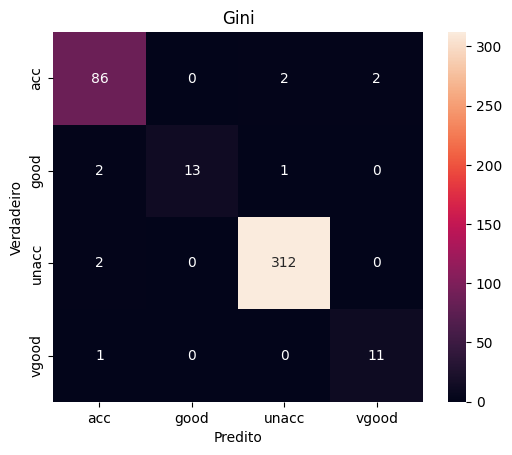

In [57]:
import seaborn as sns

# square=True para deixar a matriz quadrada
# fmt - formata a apresentação da matriz para Decimal Integer

sns.heatmap(
    confusion_gini,
    fmt='d',
    square=True, 
    annot=True, 
    yticklabels=classificador_gini.classes_, 
    xticklabels=classificador_gini.classes_
)

plt.title('Gini')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

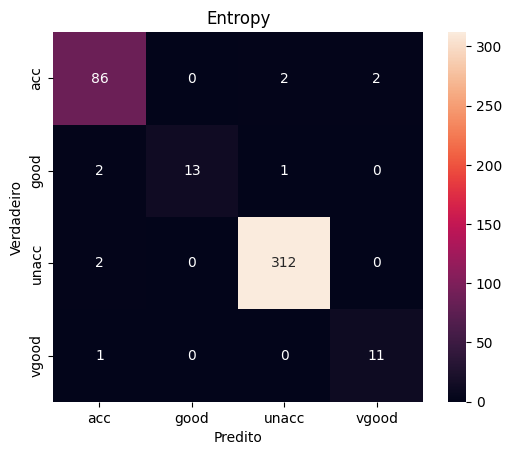

In [58]:
sns.heatmap(
    confusion_entropy,
    fmt='d',
    square=True,
    annot=True,
    yticklabels=classificador_entropy.classes_,
    xticklabels=classificador_entropy.classes_
)

plt.title('Entropy')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()